# Exercise 2 



# 1. Git and GitHub

1. Create a new repository for this class on GitHub.
2. Clone that repository to your computer.
3. Create a Julia environment for your project. Add the `Plots` package.
4. You should now see the files Project.toml and Manifest.toml in your project directory. Commit them to your repo with an appropriate commit message.
5. Push your changes to GitHub. Do you now see the two files on GitHub?

# 2. Types, Structs, and Multiple Dispatch


The genus [*Homo*](https://en.wikipedia.org/wiki/Homo) includes the species *Homo sapiens* (modern humans) as well as several other extinct species.

1. Translate [this taxonomy](https://en.wikipedia.org/wiki/Homo#Phylogeny) (only the bottom right part, from Homo onwards) into a Julia type hierarchy:  
    a. Species which evolved into other species, for example *Homo heidelbergensis*, should be represented as Julia abstract types, with their descendants as corresponding Julia subtypes.  
    b. For *Homo neanderthalensis*, *Denisova people* and *Homo sapiens*, create a composite type (struct) containing some information about them, for example, the individual's name.   
    c. Ignore the remaining species without descendants.
    
    
2. Given instances of any two of the composite types you just defined, can you define a Julia function to print their most recent common ancestor using multiple dispatch? For example, the most recent common ancestor of *Homo sapiens* and *Homo neanderthalensis* is *Homo heidelbergensis*. If the two individuals are of the same species, print that.

In [1]:
abstract type Homo end
abstract type HomoErectus <: Homo end
abstract type HomoHeidelbergensis <: HomoErectus end
abstract type Neandersovans <: HomoHeidelbergensis end

struct HomoSapiens <: HomoHeidelbergensis
    name
end

struct HomoNeanderthalensis <: Neandersovans
    name
end

struct DenisovaPeople <: Neandersovans
    name
end

In [2]:
function common_ancestor(a::Neandersovans, b::Neandersovans)
    println("Most recent common ancestor is the Neandersovans.")
end

function common_ancestor(a::HomoHeidelbergensis, b::HomoHeidelbergensis)
    println("Most recent common ancestor is the HomoHeidelbergensis.")
end

function common_ancestor(a::HomoSapiens, b::HomoSapiens)
    println("Same species.")
end

function common_ancestor(a::HomoNeanderthalensis, b::HomoNeanderthalensis)
    println("Same species.")
end

function common_ancestor(a::DenisovaPeople, b::DenisovaPeople)
    println("Same species.")
end

common_ancestor (generic function with 5 methods)

In [3]:
a = HomoSapiens("a")
b = HomoNeanderthalensis("b")
c = DenisovaPeople("c")
common_ancestor(a, a)

Same species.


# Code the Euler Solvers

Implement both the simple and improved Euler solver in Julia's OOP style. 

* Write a `struct` that specifices the ODE problem that you are trying to solve, saving all information about the Differential Equation and initial condition, parameters and time span, Tip: `structs` can also hold functions!
* Write `struct`s for each of the two solver variants 
* Write a function `solve` that accepts the problem and solver types and returns a trajectory of the system 

In [4]:
import Base: show # we have to import this to add custom print/display messages

abstract type AbstractDEProblem end
abstract type AbstractSolver end 

struct ODEProblem <: AbstractDEProblem 
    f # the rhs of the equation, signature f(x,Θ,t)
    x0::AbstractArray # initial condition 
    tspan # tuple, (t_0, t_end)
    Θ::AbstractArray # parameters 
end
# we can add custom show commands, that are displayed when we print/display the struct 
show(io::IO, prob::ODEProblem) = string("ODE with initial condition = ",prob.x0, "and parameters ",prob.Θ)

struct SimpleEulerSolver <: AbstractSolver
    Δt::Number 
end 
show(io::IO, sol::SimpleEulerSolver) = string("Simple Euler Solver with step size=",sol.Δt)

"""
    solve(prob::ODEProblem, alg, N::Integer=100)

Given a `prob` ODE problem, and a solver `alg` return a `N` long trajectory as an Array. 

This is a docstring, which is shown e.g. when you type in ?solve, it supports basic Markdown features to highlight text or code. 
"""
function solve(prob::ODEProblem, alg::SimpleEulerSolver)
    x0 = prob.x0 
    Δt = alg.Δt

    t = prob.tspan[1]:Δt:prob.tspan[2] # time axis 

    x = zeros(eltype(x0), size(prob.x0)..., length(t)) # pre allocate memory for the trajectory  
    x[:,1] = x0 # set the initial condition 


    for i ∈ 2:length(t) # the simple Euler Loop
        x[:,i] = x[:,i-1] + Δt .* prob.f(x[:,i-1], prob.Θ, t[i]) 
    end

    t, x 
end

struct ImprovedEulerSolver <: AbstractSolver
    Δt::Number
end 
show(io::IO, prob::ImprovedEulerSolver) = string("Improved Euler Solver with step size=",sol.Δt)

function solve(prob::ODEProblem, alg::ImprovedEulerSolver)
    x0 = prob.x0 
    Δt = alg.Δt

    t = prob.tspan[1]:Δt:prob.tspan[2] # time axis 

    x = zeros(eltype(x0), size(prob.x0)..., length(t)) # pre allocate memory for the trajectory  
    x[:,1] = x0 # set the initial condition 


    for i ∈ 2:length(t) # the improved Euler Loop
        x_trial = x[:,i-1] + Δt * prob.f(x[:,i-1], prob.Θ, t[i]) # trial step 
        x[:,i] = x[:,i-1] + 0.5 * (prob.f(x[:,i-1], prob.Θ, t[i]) + prob.f(x_trial, prob.Θ, t[i])) * alg.Δt # improved Euler step
    end

    t, x 
end

solve (generic function with 2 methods)

Now we can put these solvers to a test

## Test Your Solvers with the Lotka-Volterra System

Now, test your solvers by integrating the Lotka-Volterra system (LV), modelling predetator-prey dynamics. In this model the prey, here rabbits, have unlimited food supply but are hunted by predators, here foxes. The predators only hunt the prey, and otherwise die if no prey is available. When $R$ is the amount of rabbits, and $F$ is the amount of foxes, then their population dynamics are described by 

$ \frac{dH}{dt} = \alpha H - \beta H F \\
   \frac{dF}{dt} = -\gamma F + \delta H F $

All parameters are positive, real numbers.

* What could the four different terms in the LV stand for? 

* Integrate the LV from $t_0=0$ to $t_{end}=50$ with $\alpha=1$, $\beta=0.5$, $\gamma=1.$, $\delta=0.2$ and $x_0=[20.,5.]$ 

* Test both solvers for different step sizes $\Delta t =0.01$, $\Delta t =0.05$, $\Delta t=0.1$. What are you observing? 

* Looking at the trajectories you get, can you think of one major short coming of the model? Where is it the most unrealistic? 

### Tips

* The initial conditions (like the states) need to be floating numbers, not integer, so intialize them as floats (e.g. `[20., 20.]` instead of `[20, 20]`), otherwise you might run into errors

In [5]:
function lotka_volterra(x,p,t)
    α, β, γ, δ = p 
    [α*x[1] - β*x[1]*x[2], -γ*x[2] + δ*x[1]*x[2]]
end

α = 1.
β = 0.5
γ = 1.
δ = 0.2
p = [α, β, γ, δ] 
tspan = (0.,50.)

x0 = [20., 5.] 

prob = ODEProblem(lotka_volterra, x0, tspan, p) 

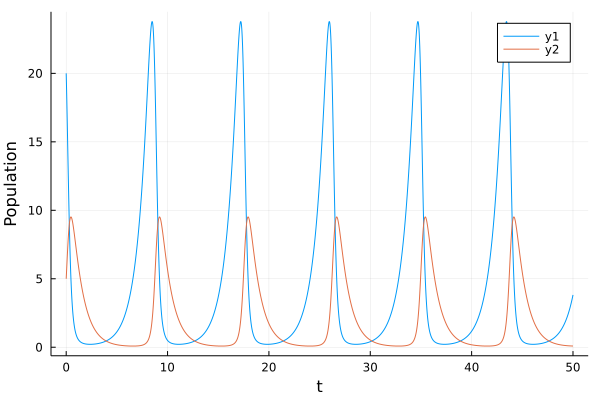

In [6]:
using Plots 

Δt = 0.01
t1, sol1 = solve(prob, SimpleEulerSolver(Δt))
t2, sol2 = solve(prob, ImprovedEulerSolver(Δt))

plot(t2, transpose(sol2), xlabel="t", ylabel="Population")

First, we just look at one integration from the improved Euler solver to see how the dynamics look like. With the initial condition $x_0$, we start with a state with a lot of prey (blue/green), then the predators hunt these and their population subsequently grows, which leads to a declining prey population. This then leads to the predator population decreasing which again leads to a growing prey population. Now let's compare the two solvers:

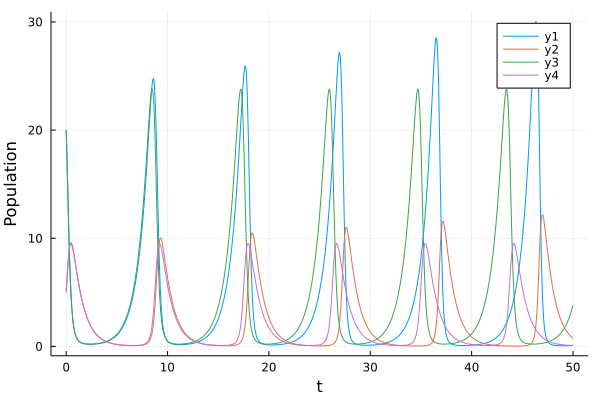

In [7]:
plot(t1, transpose(sol1), xlabel="t", ylabel="Population")
plot!(t2, transpose(sol2))

With both solvers we see oscillations. 

Both can capture the qualitative behaviour we just described at $\Delta t=0.01$, but with increasing time $t$ we see that the larger inaccuracies of the simple Euler solver lead to both trajectories not lining up perfectly after some oscillations.

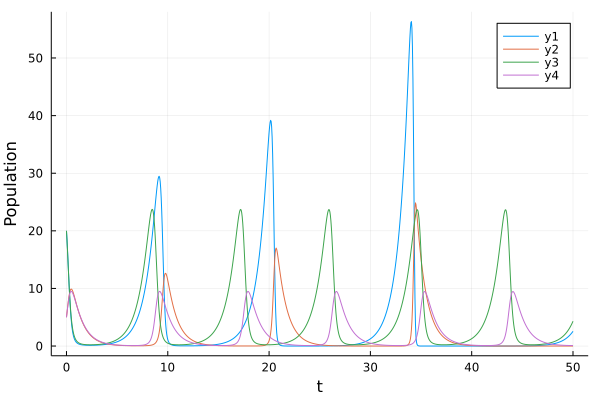

In [8]:
Δt = 0.05
t1, sol1 = solve(prob, SimpleEulerSolver(Δt))
t2, sol2 = solve(prob, ImprovedEulerSolver(Δt))

plot(t1, transpose(sol1), xlabel="t", ylabel="Population")
plot!(t2, transpose(sol2))

In this case, for a slightly larger $\Delta t$, the simple Euler solver (blue/red) gets even more inaccuracies, with the prey population massively increasing in each cycle. The improved Euler solver on the other hand returns almost the same trajectory as before 

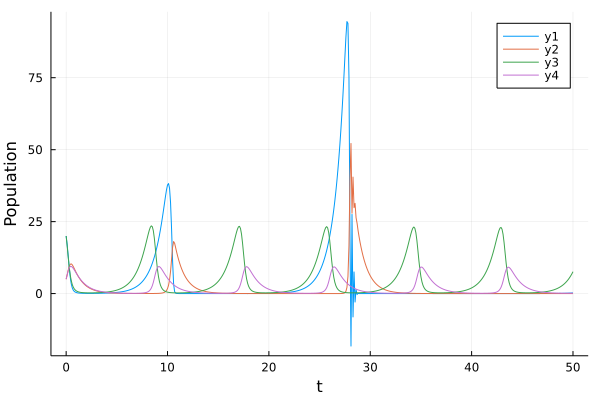

In [9]:
Δt = 0.1
t1, sol1 = solve(prob, SimpleEulerSolver(Δt))
t2, sol2 = solve(prob, ImprovedEulerSolver(Δt))

plot(t1, transpose(sol1), xlabel="t", ylabel="Population")
plot!(t2, transpose(sol2))

When we increase $\Delta t$ even further, the simple Euler solver can't integrate the system anymore at all and becomes unstable whereas the improved Euler solver sill remains stable

One major shortcome of the model is that the population can recover even if it gets extremely small, as you see in these trajectories. In the real world it is likely that at one of these points the population will just die off as "0.001 rabbits" are not possible. 